In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
data.shape

(5110, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.replace(to_replace="Urban", value=1, inplace=True)
data.replace(to_replace="Rural", value=0, inplace=True)

data.replace(to_replace="Yes", value=1, inplace=True)
data.replace(to_replace="No", value=0, inplace=True)

In [8]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,1,Private,0,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,0,Private,1,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,1,Private,0,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,1,Private,1,58.57,24.2,Unknown,1


## Correlation between the different features and the target variable
The correlation between different features can be best understood by the following Heatmap:


C:\Users\hp\AppData\Local\Temp\ipykernel_25292\1212894860.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="BuPu", annot=True)


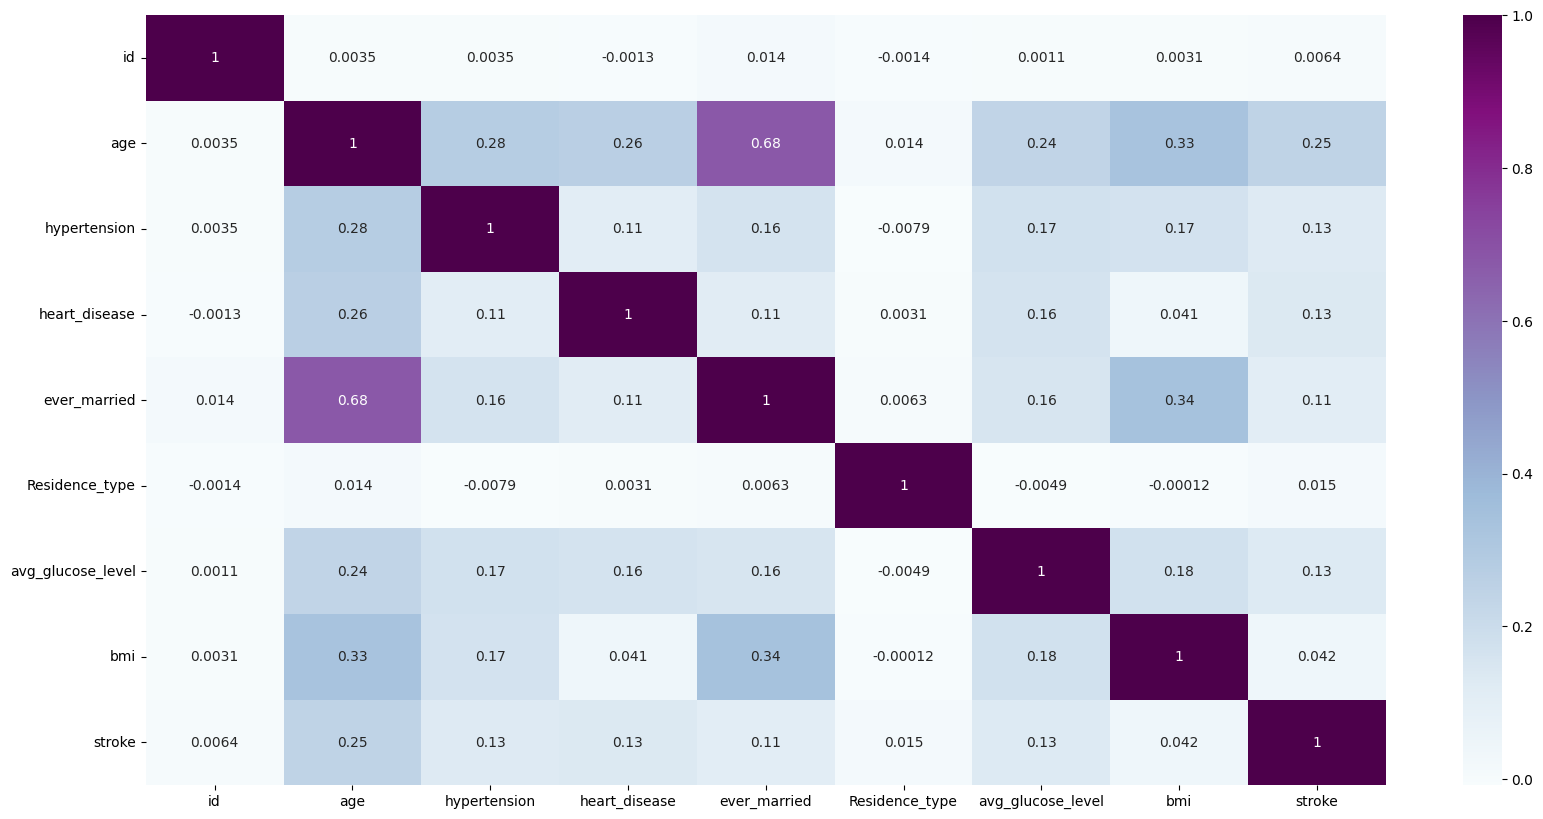

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap="BuPu", annot=True)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_25292\2636420491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


<Figure size 2000x2000 with 0 Axes>

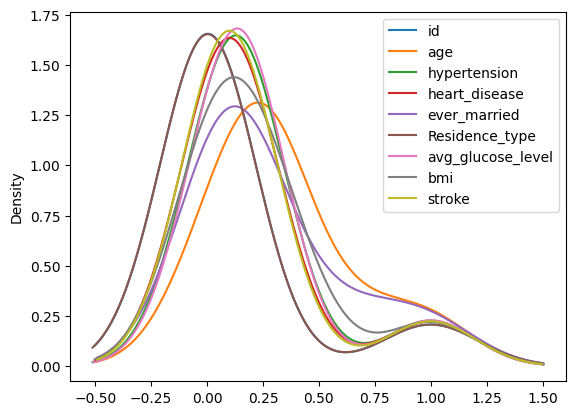

In [10]:
plt.figure(figsize=(20,20))
data_corr = data.corr()
data_corr.plot(kind='kde')
plt.show()

#### From the above heatmap, it is clear that age is the most significant factor affecting the occurance of stroke as it has the highest correlation coefficient.

### Distribution of individuals encountering stroke with the help of smoking status and work type



Text(0, 0.5, 'Individuals with stroke: Smoking status')

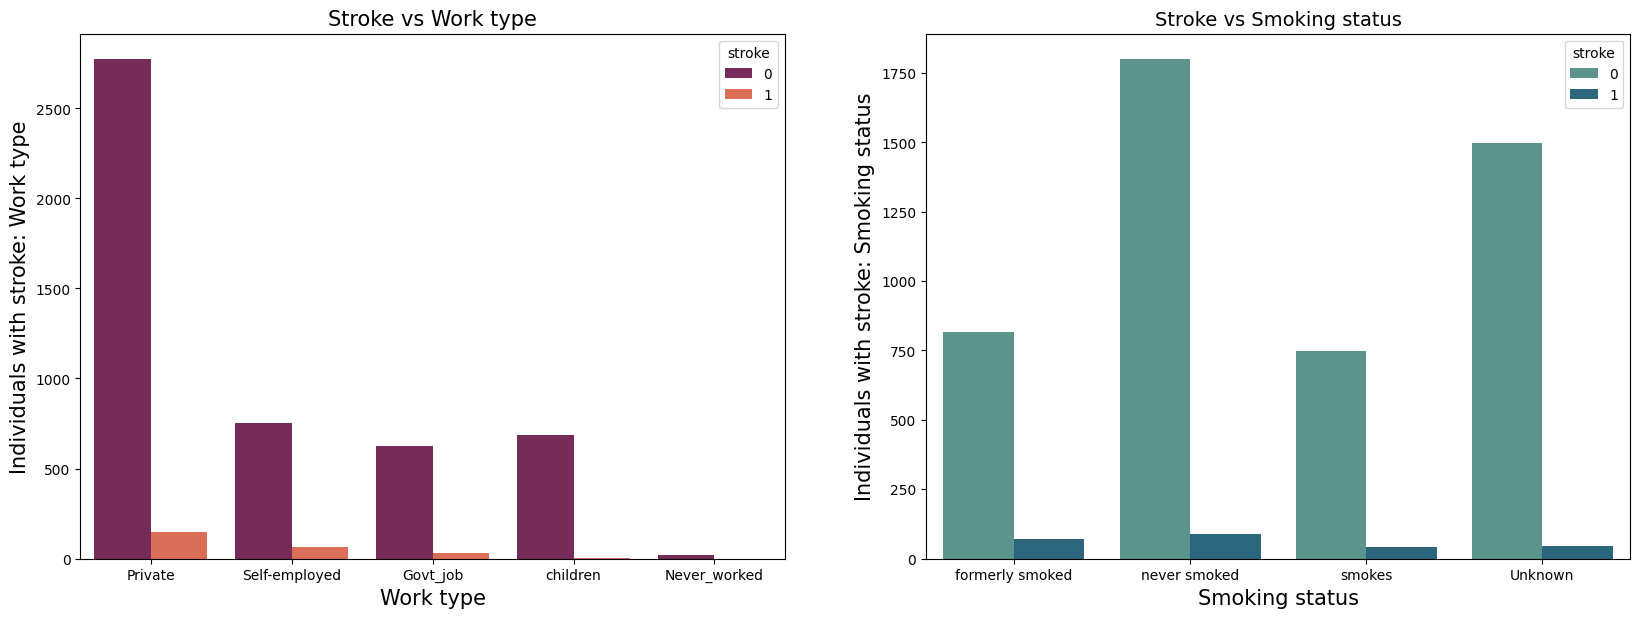

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = data.work_type, hue = data.stroke, palette="rocket")
plt.title('Stroke vs Work type', fontsize=15)
plt.xlabel('Work type', fontsize=15)
plt.ylabel('Individuals with stroke: Work type', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = data.smoking_status, hue = data.stroke, palette="crest")
plt.title('Stroke vs Smoking status', fontsize=14)
plt.xlabel('Smoking status', fontsize=15)
plt.ylabel('Individuals with stroke: Smoking status', fontsize=15)

### Significance of Hypertension in Stroke

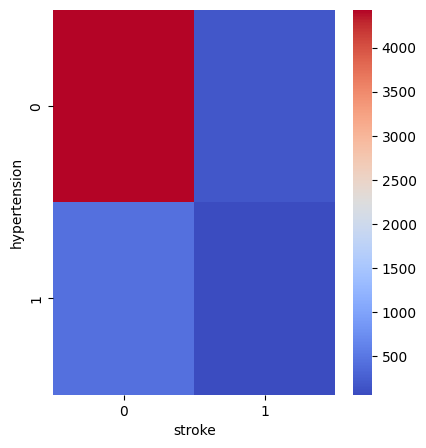

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.heatmap(pd.crosstab(data['hypertension'],data['stroke']), cmap="coolwarm")
plt.show()

## Autovisualization

In [16]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

ModuleNotFoundError: No module named 'autoviz'

In [14]:
df = AV.AutoViz("healthcare-dataset-stroke-data.csv")
df = AV.AutoViz("healthcare-dataset-stroke-data.csv", depVar='stroke')

NameError: name 'AV' is not defined

# Data Preprocessing

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.id)
data = data.reset_index(drop=True)

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### One-Hot Encoding

### One-hot encoding is essentially the representation of categorical variables as binary vectors.

In [ ]:
data= pd.get_dummies(data, columns=['work_type', 'smoking_status', 'gender'])
data.drop(columns=['id'], inplace=True)
data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.7,1,0,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1,1,0,0
4,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0,1,0,0


### Feature Scaling

### MinMaxScaler - Data is scaled in the range of 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)
print(scaled_data)

[[0.81689453 0.         1.         ... 0.         1.         0.        ]
 [0.74365234 0.         0.         ... 1.         0.         0.        ]
 [0.97558594 0.         1.         ... 0.         1.         0.        ]
 ...
 [0.42626953 0.         0.         ... 1.         0.         0.        ]
 [0.62158203 0.         0.         ... 0.         1.         0.        ]
 [0.53613281 0.         0.         ... 1.         0.         0.        ]]


### StandardScaler - A feature is scaled by subtracting the mean from all the data points and dividing the resultant values by the standard deviation of the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)
print(scaled_data)

[[ 1.05143428 -0.32860186  4.18503199 ... -1.18950991  1.18998977
  -0.01399046]
 [ 0.78607007 -0.32860186 -0.2389468  ...  0.84068236 -0.84034336
  -0.01399046]
 [ 1.62639008 -0.32860186  4.18503199 ... -1.18950991  1.18998977
  -0.01399046]
 ...
 [-0.36384151 -0.32860186 -0.2389468  ...  0.84068236 -0.84034336
  -0.01399046]
 [ 0.34379639 -0.32860186 -0.2389468  ... -1.18950991  1.18998977
  -0.01399046]
 [ 0.03420481 -0.32860186 -0.2389468  ...  0.84068236 -0.84034336
  -0.01399046]]


## Splitting data into Training and Testing set

In [ ]:
y_Data = data.pop('stroke').to_numpy()
x_Data = data.to_numpy()

x_Data = x_Data.astype(np.float32)
y_Data = y_Data.astype(np.float32)
x_Data.shape, y_Data.shape

((5110, 19), (5110,))

In [ ]:
split = int(0.80*len(x_Data))

x_Train = x_Data[:split]
y_Train = y_Data[:split]

x_Test = x_Data[split:]
y_Test = y_Data[split:]

# Classification

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_Train, y_Train)
lr.score(x_Train, y_Train)

0.9393346379647749

### K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(10)
knn.fit(x_Train, y_Train)
knn.score(x_Train, y_Train)

0.9388454011741683

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_Train, y_Train)
nb.score(x_Train, y_Train)

0.40631115459882583

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_Train, y_Train)
sv.score(x_Train, y_Train)

0.9390900195694716

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_Train, y_Train)
rf.score(x_Train, y_Train)

1.0

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_Train, y_Train)
dt.score(x_Train, y_Train)

1.0

## Performance Analysis

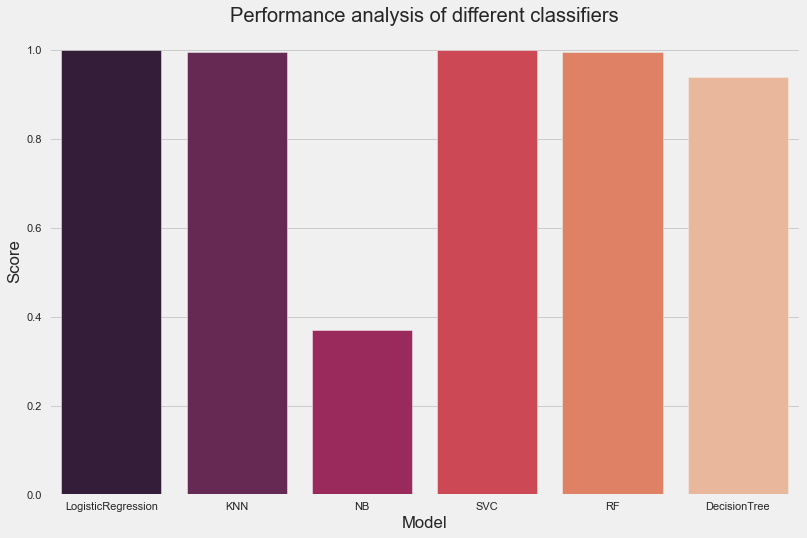

In [ ]:
dataPerf = pd.DataFrame(data={'Model': ['LogisticRegression', 'KNN', 'NB', 'SVC','RF',  'DecisionTree'], 'Score': [lr.score(x_Test, y_Test), knn.score(x_Test, y_Test), nb.score(x_Test, y_Test),sv.score(x_Test, y_Test), rf.score(x_Test, y_Test), dt.score(x_Test, y_Test)]})

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=dataPerf, palette="rocket")
plt.title('Performance analysis of different classifiers')
plt.show()

In [ ]:
dataPerf

,Model,Score
0,LogisticRegression,1.000000
1,KNN,0.997065
2,NB,0.369863
3,SVC,1.000000
4,RF,0.996086
5,DecisionTree,0.940313


## Confusion Matrices

In [ ]:
pred_lr = lr.predict(x_Test)
pred_knn = knn.predict(x_Test)
pred_nb = nb.predict(x_Test)
pred_svc = sv.predict(x_Test)
pred_rf = rf.predict(x_Test)
pred_dt = dt.predict(x_Test)
pred_Vals = pd.DataFrame(data={'truth': y_Test, 'regression': pred_lr, 'knn': pred_knn, 'naive-bayes': pred_nb, 'svm': pred_svc, 'random-forest': pred_rf, 'decision-tree': pred_dt})

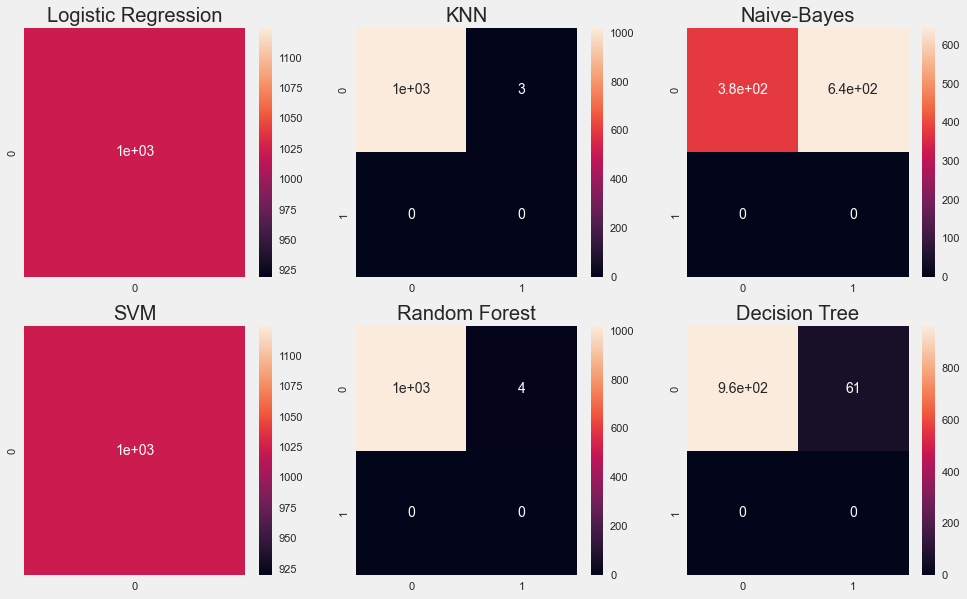

In [ ]:
plt.figure(figsize=(15, 9.375))
plt.subplot(2, 3, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_Test, pred_lr), annot=True).set(title='Logistic Regression')
plt.subplot(2, 3, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(y_Test, pred_knn), annot=True).set(title='KNN')
plt.subplot(2, 3, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(y_Test, pred_nb), annot=True).set(title='Naive-Bayes')
plt.subplot(2, 3, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(y_Test, pred_svc), annot=True).set(title='SVM')
plt.subplot(2, 3, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(y_Test, pred_rf), annot=True).set(title='Random Forest')
plt.subplot(2, 3, 6)
sns.heatmap(sklearn.metrics.confusion_matrix(y_Test, pred_dt), annot=True).set(title='Decision Tree')
plt.show()

#### From the above graphs and scores, we can conclude that the Logistic Regression and the Support Vector classifier are the best suited models for this classification followed closely by the K-nearest neighbours and the Random Forest Classifier models.